In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../")
import setigen as stg

In [3]:
fil = Waterfall('../setigen/assets/placeholder.fil')

In [4]:
fil.data.shape

(32, 1, 1024)

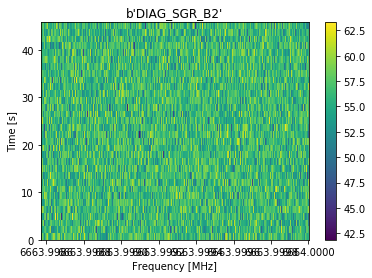

In [5]:
fil.plot_waterfall()

In [6]:
fil.write_to_fil('data/injected.fil')

blimpy.waterfall INFO     Conversion time: 0.18sec


/home/bryanb/miniconda3/lib/python3.6/site-packages/blimpy/utils.py:9: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(x)


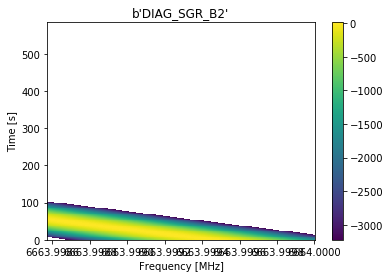

In [43]:
# fil = Waterfall('../setigen/assets/placeholder.fil')

tsamp = 18.253611008
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fil.tsamp = tsamp
fil.fch1 = fch1
fil.df = df

fchans = 2**16
tchans = 256

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

signal = stg.generate(ts,
                      fs,
                      stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                      stg.constant_t_profile(level = 10),
                      stg.gaussian_f_profile(width = 0.00002),
                      stg.constant_bp_profile(level = 1.0))

# frame = stg.inject_noise(signal) + 5

fil.data = signal

fil.plot_waterfall()

In [41]:
fil._setup_freqs()

(0, 1024, 0, 1024)

In [42]:
fil.freqs

array([6095.21484235, 6095.21483956, 6095.21483677, ..., 6095.21198971,
       6095.21198692, 6095.21198412])

In [37]:
fil.header[b'tsamp'] = tsamp
fil.header[b'fch1'] = fch1
fil.header[b'foff'] = df

In [44]:
vars(fil)

{'filename': '../setigen/assets/placeholder.fil',
 'ext': '.fil',
 'container': <blimpy.file_wrapper.FilReader at 0x7f7d6aace0f0>,
 'file_header': {b'machine_id': 20,
  b'telescope_id': 6,
  b'src_raj': <Angle 17.7875 hourangle>,
  b'src_dej': <Angle -28.3831 deg>,
  b'az_start': 0.0,
  b'za_start': 0.0,
  b'data_type': 1,
  b'fch1': 6095.214842353016,
  b'foff': -2.7939677238464355e-06,
  b'nchans': 1024,
  b'nbeams': 1,
  b'ibeam': -1,
  b'nbits': 32,
  b'tstart': 58465.717094907406,
  b'tsamp': 18.253611008,
  b'nifs': 1,
  b'source_name': b'DIAG_SGR_B2',
  b'rawdatafile': b'blc13_guppi_58465_61957_DIAG_SGR_B2_0066.0000.raw'},
 'header': {b'machine_id': 20,
  b'telescope_id': 6,
  b'src_raj': <Angle 17.7875 hourangle>,
  b'src_dej': <Angle -28.3831 deg>,
  b'az_start': 0.0,
  b'za_start': 0.0,
  b'data_type': 1,
  b'fch1': 6095.214842353016,
  b'foff': -2.7939677238464355e-06,
  b'nchans': 1024,
  b'nbeams': 1,
  b'ibeam': -1,
  b'nbits': 32,
  b'tstart': 58465.717094907406,
  b'tsa

In [8]:
fil0 = Waterfall('data/injected.fil')
vars(fil0)

{'filename': 'data/injected.fil',
 'ext': '.fil',
 'container': <blimpy.file_wrapper.FilReader at 0x7f7d6c621080>,
 'file_header': {b'machine_id': 20,
  b'telescope_id': 6,
  b'src_raj': <Angle 17.7875 hourangle>,
  b'src_dej': <Angle -28.3831 deg>,
  b'az_start': 0.0,
  b'za_start': 0.0,
  b'data_type': 1,
  b'fch1': 6663.99999987334,
  b'foff': -1.3969838619232178e-06,
  b'nchans': 1024,
  b'nbeams': 1,
  b'ibeam': -1,
  b'nbits': 32,
  b'tstart': 58465.717094907406,
  b'tsamp': 1.431655765333332,
  b'nifs': 1,
  b'source_name': b'DIAG_SGR_B2',
  b'rawdatafile': b'blc13_guppi_58465_61957_DIAG_SGR_B2_0066.0000.raw'},
 'header': {b'machine_id': 20,
  b'telescope_id': 6,
  b'src_raj': <Angle 17.7875 hourangle>,
  b'src_dej': <Angle -28.3831 deg>,
  b'az_start': 0.0,
  b'za_start': 0.0,
  b'data_type': 1,
  b'fch1': 6663.99999987334,
  b'foff': -1.3969838619232178e-06,
  b'nchans': 1024,
  b'nbeams': 1,
  b'ibeam': -1,
  b'nbits': 32,
  b'tstart': 58465.717094907406,
  b'tsamp': 1.431655